<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import re #used this for experimenting; may not be necessary 
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [6]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: 
movies.shape 

(979, 6)

#### Check the data type of each column.

In [7]:
# Answer:
movies.dtypes 

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [8]:
# Answer:

print(movies.loc[:, 'duration'].mean())
#assuming duration is measured in minutes, just over two hours (121 mins)

120.979570991


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [ ]:
# Answer:
print(movies.sort_values(by='duration', ascending=False).head(1)) #longest movie: Hamlet, at 242 minutes. 
print(movies.sort_values(by='duration', ascending=False).tail(1)) #shortest movie: Freaks, at 64 minutes. A classic!

#### Create a histogram of duration, choosing an "appropriate" number of bins.

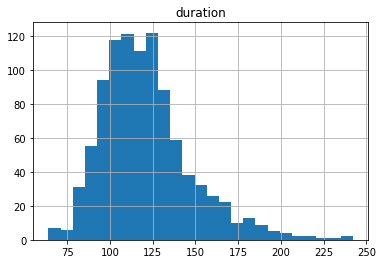

In [20]:
# Answer:
ax = movies.hist('duration', bins=25) #this seems appropriate, or at least not inappropriate.

#### Use a box plot to display that same data.

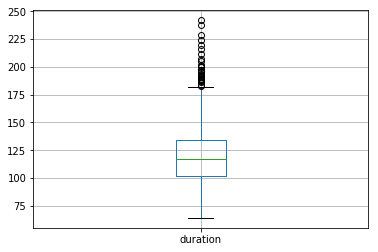

In [29]:
# Answer:
ax = movies.boxplot(column='duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [152]:
# Answer:
count_ratings = movies.loc[:, 'content_rating'].value_counts()
print(count_ratings)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

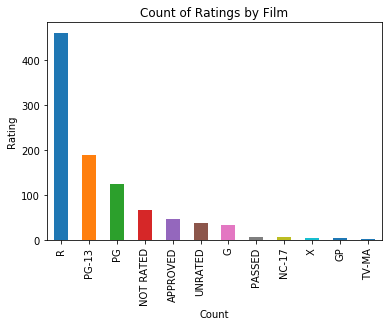

In [153]:
# Answer:
ax = count_ratings.plot.bar()
ax.set_title('Count of Ratings by Film')
ax.set_xlabel('Count')
ax.set_ylabel('Rating');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [267]:
# Answer:
#not entirely sure if you want me to modify this series or the original dataframe, so I'll do both: 
y = ['NOT RATED', 'APPROVED', 'PASSED', 'GP']

count_ratings.index = [i if i not in y else 'UNRATED' for i in count_ratings.index]
print(count_ratings) 

movies['content_rating'].replace(y, 'UNRATED', inplace=True)

R          460
PG-13      189
PG         123
UNRATED     65
UNRATED     47
UNRATED     38
G           32
UNRATED      7
NC-17        7
NC-17        4
UNRATED      3
NC-17        1
Name: content_rating, dtype: int64


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [268]:
# Answer:
#not entirely sure if you want me to modify this series or the original dataframe, so I'll do both: 
z = ['X', 'TV-MA'] #using this almost out of habit. . . 

count_ratings.index = [i if i not in z else 'NC-17' for i in count_ratings.index]
print(count_ratings)
movies['content_rating'].replace(z, 'NC-17', inplace=True)

R          460
PG-13      189
PG         123
UNRATED     65
UNRATED     47
UNRATED     38
G           32
UNRATED      7
NC-17        7
NC-17        4
UNRATED      3
NC-17        1
Name: content_rating, dtype: int64


#### Count the number of missing values in each column.

In [185]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [214]:
# Answer:
movies[movies['content_rating'].isnull()] #to examine missing data 
movies.fillna(value='PG-13', inplace=True) #to replace missing data

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [ ]:
# Answer:
lng = movies[movies['duration']>=120].loc[:, 'star_rating'].mean()
shrt = movies[movies['duration']<120].loc[:, 'star_rating'].mean()
rlt = lng/shrt


print(lng, shrt, lng/shrt) #average star ratings for >= 2 hrs and <2 hrs, respectively, 
                            #as well as the former divided by the latter for quick comparison. Longer movies within this dataset
                                #tend to have higher ratings.



#### Use a visualization to detect whether there is a relationship between duration and star rating.

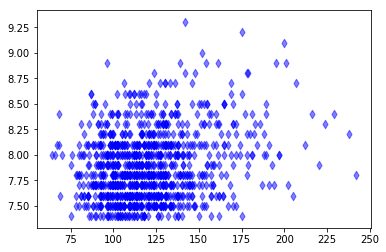

In [244]:
# Answer:

plt.scatter(x=movies.loc[:,'duration'], y=movies.loc[:,'star_rating'], 
           alpha=0.5, marker="d", c="b")#not sure how to add regression lines in Python yet, but I think this visualization helps us detect relationships reasonably well without one. 
                                            #I sense a relatively weak correlation between rating and duration. 

#### Calculate the average duration for each genre.

In [248]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

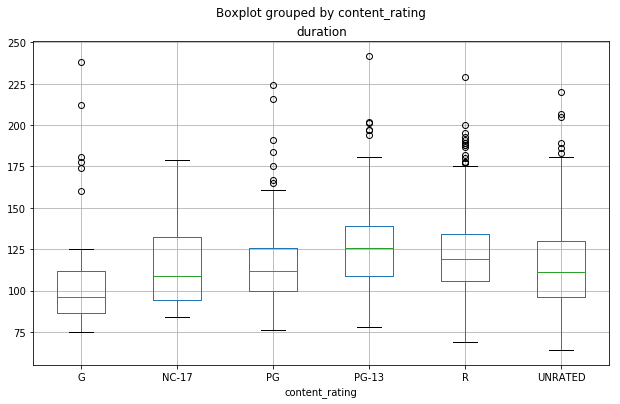

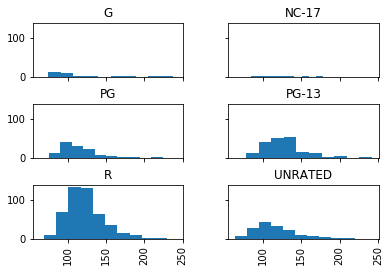

In [269]:
# Answer:
ax = movies.boxplot(column='duration', by='content_rating', figsize=(10,6))
axes = movies.hist(column='duration', by='content_rating', sharex=True, sharey=True);


#### Determine the top rated movie (by star rating) for each genre.

In [280]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [282]:
# Answer:
movies[movies.title.isin(movies[movies.title.duplicated()].title)]
#I don't think these are true duplicates. The names are similar, but the actors and durations are different, which leads me to 
#suspect that there are multiple versions of each film--e.g. ones from different countries, years, etc. 

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [288]:
# Answer:
movies.genre.value_counts() #retrive film count for each genre
my_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'] #manually create relevant list
movies[movies.genre.isin(my_genres)].groupby('genre').star_rating.mean() #filter using said list

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [316]:
# Answer:
my_list = movies.groupby('genre').filter(lambda x: (x.genre.size >= 10)).genre #probably the second time I've ever used lambda in practice
movies[movies.genre.isin(my_list)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [461]:
# Answer:
my_bool = movies.genre.value_counts() >= 10
movies.groupby('genre').star_rating.mean()[my_bool]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [321]:
# Answer:
my_agg = movies.groupby('genre').star_rating.agg(['count', 'mean'])
print(genre_ratings[my_agg['count'] >= 10])

           count      mean
genre                     
Action       136  7.884559
Adventure     75  7.933333
Animation     62  7.914516
Biography     77  7.862338
Comedy       156  7.822436
Crime        124  7.916935
Drama        278  7.902518
Horror        29  7.806897
Mystery       16  7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [459]:
#just a record of my exploration, for any possible interest
actors = movies['actors_list']
actors.value_counts()

my_first_list = pd.DataFrame([x for xs in actors for x in xs.split(',')])
print(pd.value_counts(my_first_list.values.flatten()).head(10)) # no surprise here--Robert De Niro and Tom Hanks are in quite a few movies. 
#I'm a little surprised that Jake Gyllenhaal shows up so frequently. . . 

#I'm sure there are better ways to do this. . . 
my_list = ['Robert De Niro', 'Al Pacino', 'Jake Gyllenhaal', 'Marlon Brando']

for item in my_list: 
    print("Average rating of movies featuring " + item + " is: " + 
         str(movies.groupby('actors_list')['star_rating'].mean() 
             .loc[[x for x in movies['actors_list'] if item in x]].mean()))
#I'm also surprised at how closely related the ratings are, here. Woo!
#ok, I'm not sure how surprising any of these results actually are, but I enjoyed this exercise regardless. 

[u'Robert De Niro'       13
[u'Tom Hanks'            12
[u'Clint Eastwood'       11
[u'Al Pacino'            10
[u'Johnny Depp'          10
[u'Christian Bale'        9
[u'Brad Pitt'             9
[u'James Stewart'         9
[u'Leonardo DiCaprio'     9
[u'Dustin Hoffman'        8
dtype: int64
Average rating of movies featuring Robert De Niro is: 8.04444444444
Average rating of movies featuring Al Pacino is: 8.10769230769
Average rating of movies featuring Jake Gyllenhaal is: 7.8125
Average rating of movies featuring Marlon Brando is: 8.525
